# Name: Vincent Nguyen
# Date: 08/01/2024
# CS-171, Section 61

# Test 2

# Question 1: Sequence Classification of Movie Reviews

In [1]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.preprocessing import sequence


## Load the IMDB Dataset

In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Data Preprocessing

In [3]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

## LSTM Classification Model Construction

In [4]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation= 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## Compiling and Training the Model

In [5]:
model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 3, batch_size = 64)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.6696 - loss: 0.5752 - val_accuracy: 0.7975 - val_loss: 0.4742
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.8582 - loss: 0.3483 - val_accuracy: 0.8645 - val_loss: 0.3293
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.9016 - loss: 0.2510 - val_accuracy: 0.8752 - val_loss: 0.3009


In [6]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.52%


In [7]:
from matplotlib import pyplot

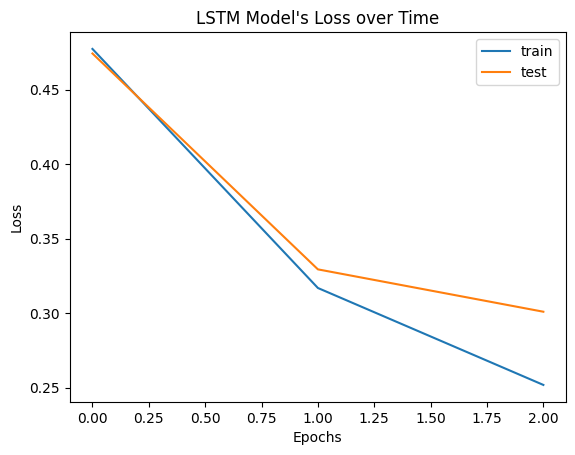

In [8]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.title('LSTM Model\'s Loss over Time')
pyplot.legend()
pyplot.show()

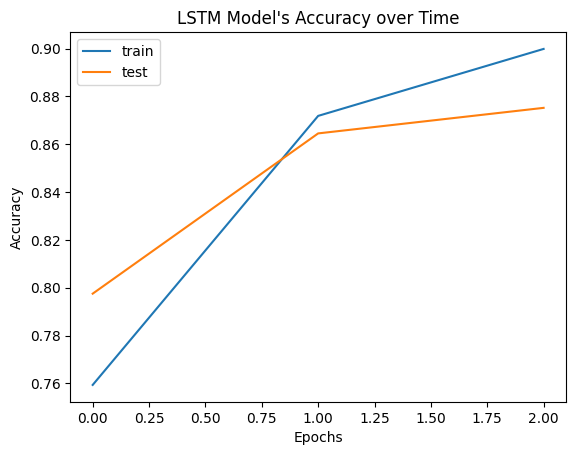

In [9]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.title('LSTM Model\'s Accuracy over Time')
pyplot.legend()
pyplot.show()

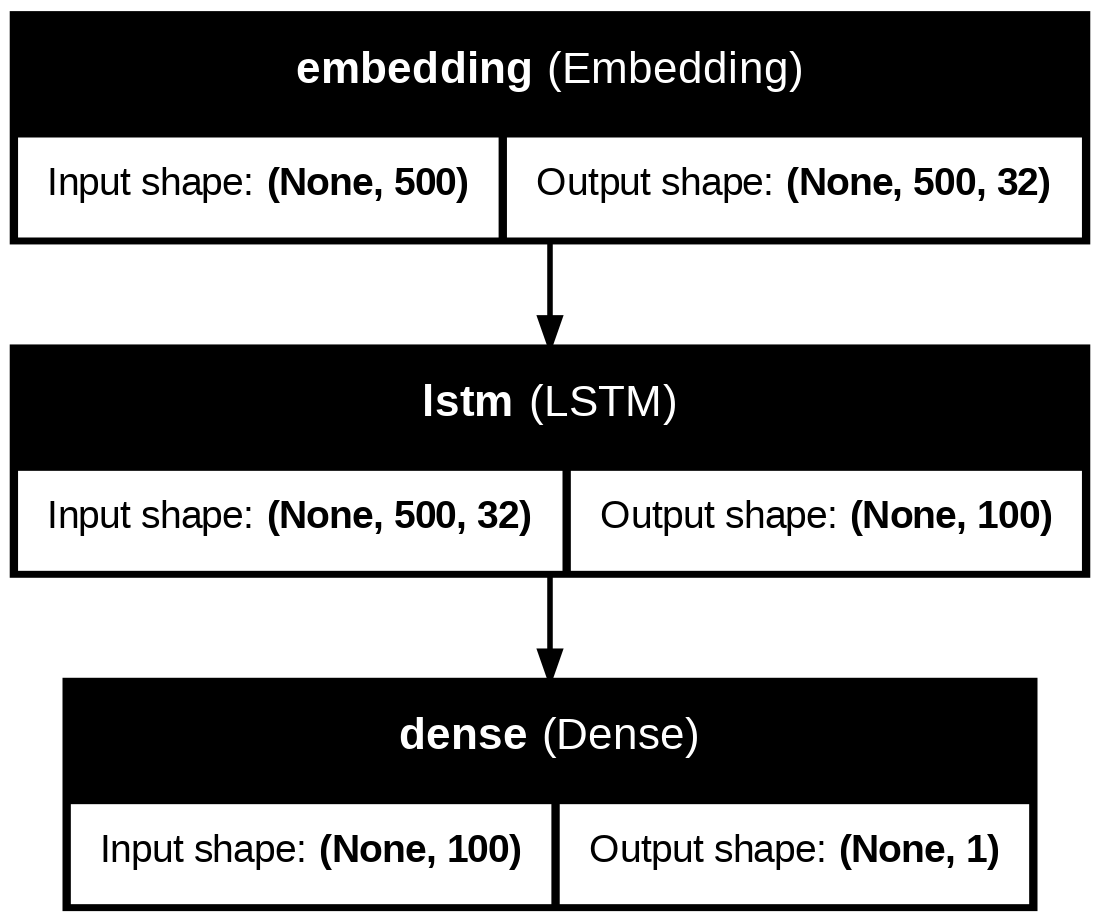

In [10]:
from keras.utils import plot_model
plot_model(model, to_file='model_imdb.png', show_shapes=True, show_layer_names=True)

## Question 1, Part A

#### NOTE: The Embedded layer doesn't actually have a 'dropout' parameter, but the LSTM layer does have such a parameter.

In [11]:
from keras.layers import Dropout

### This first model from Part A I'm training doesn't use the recurrent dropout feature. The second model of Part A will use it.

In [12]:
model_dropout = Sequential()
model_dropout.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model_dropout.add(Dropout(0.2))
model_dropout.add(LSTM(100))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(1, activation= 'sigmoid'))

In [13]:
model_dropout.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
print(model_dropout.summary())
history_dropout1 = model_dropout.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 3, batch_size = 64)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.6518 - loss: 0.5959 - val_accuracy: 0.8558 - val_loss: 0.3456
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.8747 - loss: 0.3099 - val_accuracy: 0.8657 - val_loss: 0.3219
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.8556 - loss: 0.3301 - val_accuracy: 0.8669 - val_loss: 0.3243


In [14]:
# Final evaluation of the model
scores2 = model_dropout.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores2[1]*100))

Accuracy: 86.69%


#### After implementing a 20% dropout between the Embedded and LSTM layers and another 20% dropout between the LSTM and Dense layers, I discovered that the test accuracy of the LSTM-Dropout model is actually slightly worse. This is a little disappointing... let's integrate a recurrent dropout into the LSTM layer.

### Now I'm trying a second model for Part A that does use the recurrent dropout feature.

In [15]:
model_rec_dropout = Sequential()
model_rec_dropout.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model_rec_dropout.add(Dropout(0.2))
model_rec_dropout.add(LSTM(100, recurrent_dropout = 0.2))
model_rec_dropout.add(Dropout(0.2))
model_rec_dropout.add(Dense(1, activation= 'sigmoid'))

In [16]:
model_rec_dropout.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
print(model_rec_dropout.summary())
history_dropout2 = model_rec_dropout.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 3, batch_size = 64)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 373s 949ms/step - accuracy: 0.6643 - loss: 0.5952 - val_accuracy: 0.8357 - val_loss: 0.3898
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 379s 971ms/step - accuracy: 0.8268 - loss: 0.3906 - val_accuracy: 0.8508 - val_loss: 0.3558
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 383s 975ms/step - accuracy: 0.8518 - loss: 0.3576 - val_accuracy: 0.8198 - val_loss: 0.4292


In [17]:
# Final evaluation of the model
scores3 = model_rec_dropout.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores3[1]*100))

Accuracy: 81.98%


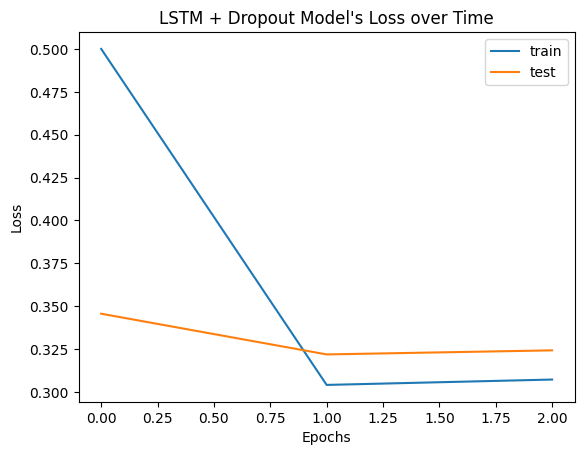

In [21]:
pyplot.plot(history_dropout1.history['loss'], label='train')
pyplot.plot(history_dropout1.history['val_loss'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.title('LSTM + Dropout Model\'s Loss over Time')
pyplot.legend()
pyplot.show()

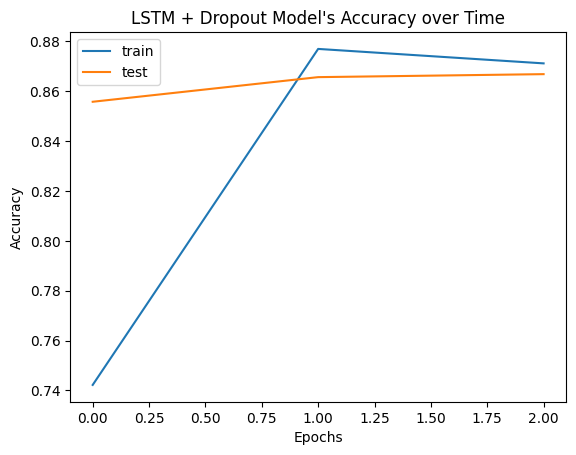

In [22]:
pyplot.plot(history_dropout1.history['accuracy'], label='train')
pyplot.plot(history_dropout1.history['val_accuracy'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.title('LSTM + Dropout Model\'s Accuracy over Time')
pyplot.legend()
pyplot.show()

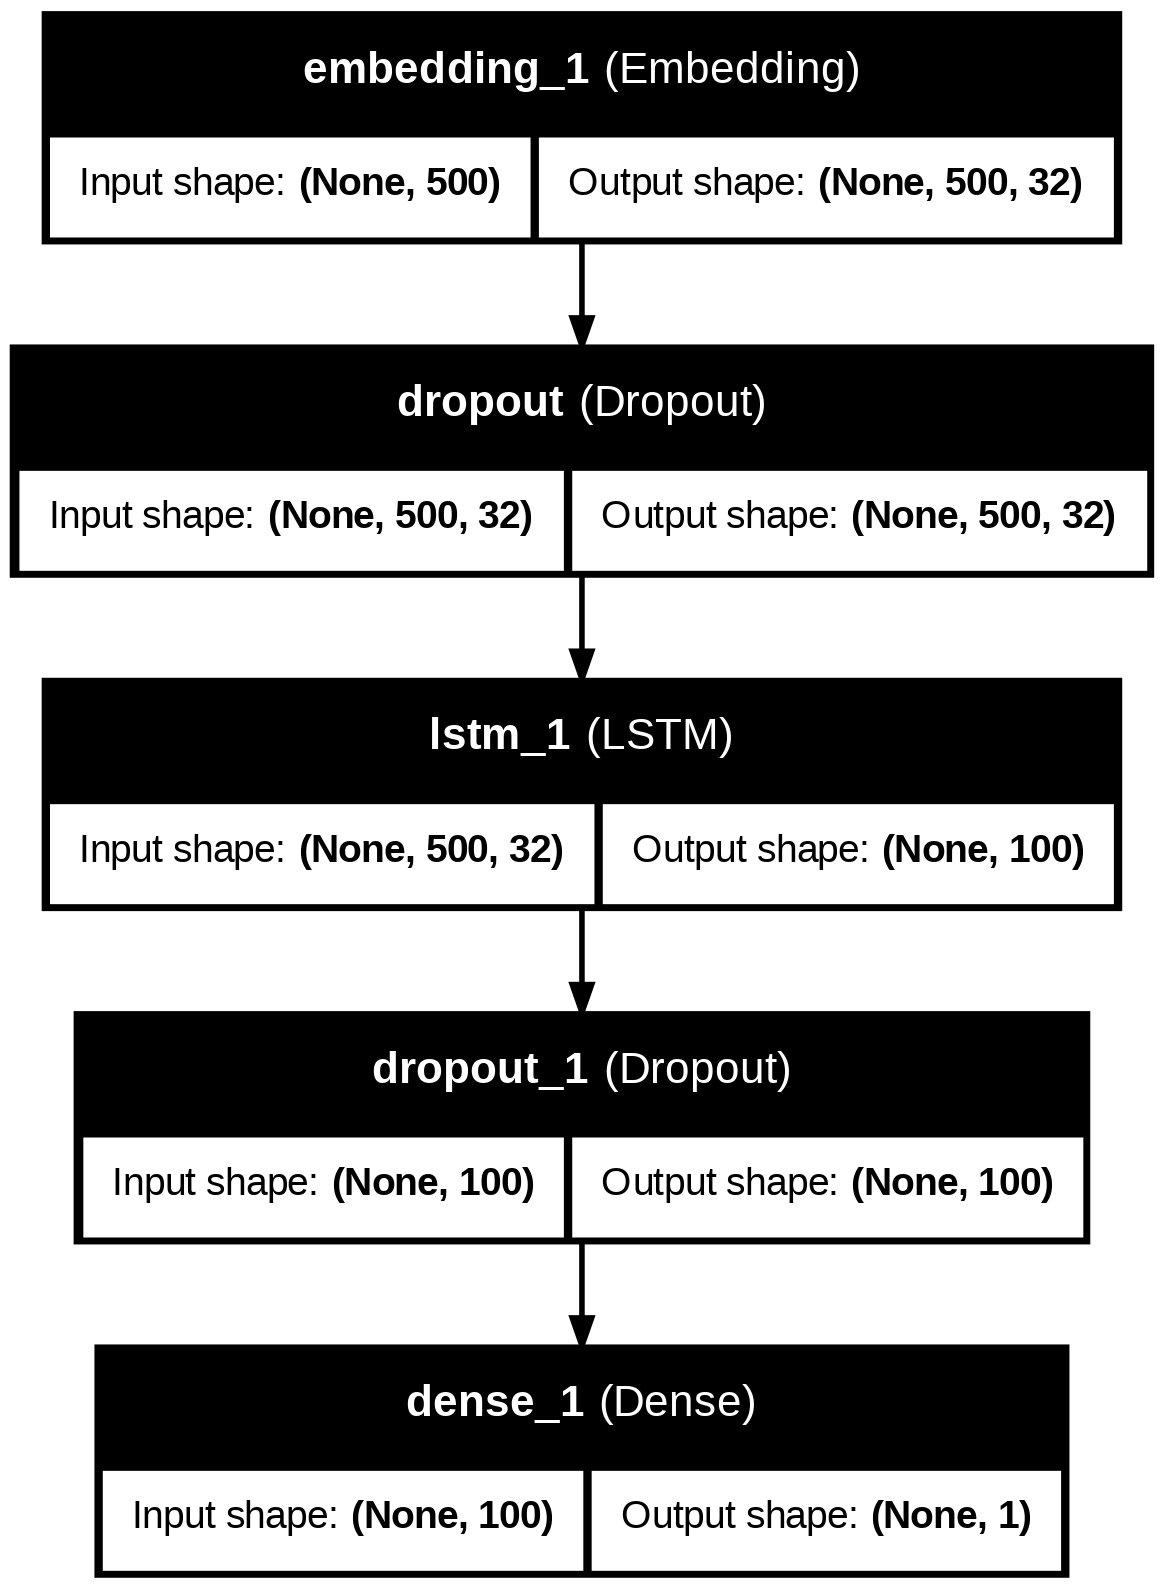

In [23]:
plot_model(model_dropout, to_file='model_imdb_dropout.png', show_shapes=True, show_layer_names=True)

### The test accuracy of the model with a recurrent dropout in the LSTM layer on top of the two previously implemented dropout layers is actually nearly 5% lower than that of the model with just the two dropout layers and no recurrent dropout. Overall, both models fare worse than the original one over 3 epochs.

### It should also be noted that the runtime for the recurrent_dropout model is significantly higher if the runtime environment if a T4 GPU. If the environment was a CPU, then both models would have similar runtimes with roughly 10 to 13 minutes per epoch.

## Question 1, Part B

In [24]:
from keras.layers import Conv1D, MaxPooling1D

In [ ]:
model_cnn = Sequential()
model_cnn.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model_cnn.add(Conv1D(32, 3, padding='same', activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(LSTM(100))
model_cnn.add(Dense(1, activation= 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model_cnn.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
print(model_cnn.summary())
history_cnn = model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 3, batch_size = 64)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 223s 563ms/step - accuracy: 0.6678 - loss: 0.5685 - val_accuracy: 0.8746 - val_loss: 0.3028
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 295s 647ms/step - accuracy: 0.8987 - loss: 0.2558 - val_accuracy: 0.8746 - val_loss: 0.3028
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 247s 633ms/step - accuracy: 0.9261 - loss: 0.1974 - val_accuracy: 0.8844 - val_loss: 0.2835


In [ ]:
# Final evaluation of the model
scores4 = model_cnn.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores4[1]*100))

Accuracy: 88.44%


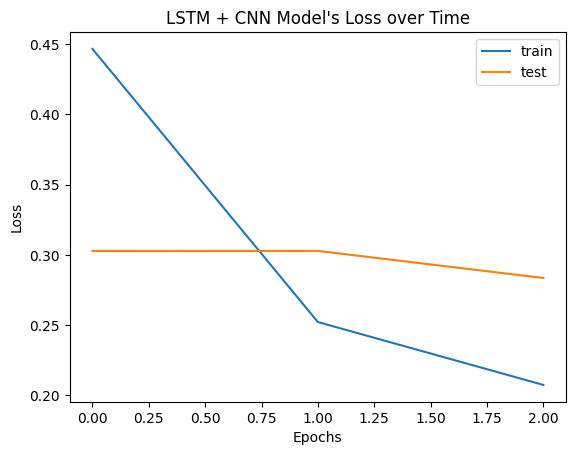

In [ ]:
pyplot.plot(history_cnn.history['loss'], label='train')
pyplot.plot(history_cnn.history['val_loss'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.title('LSTM + CNN Model\'s Loss over Time')
pyplot.legend()
pyplot.show()

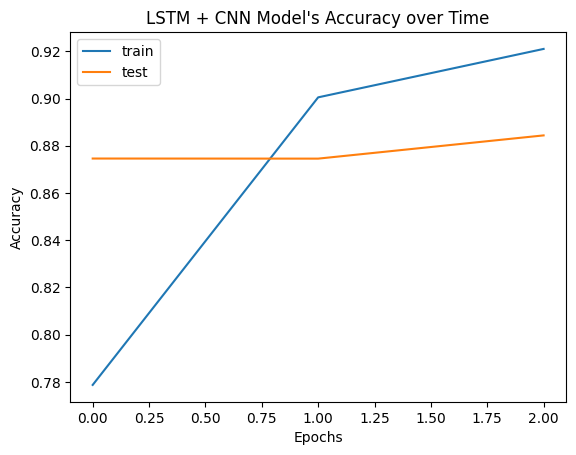

In [ ]:
pyplot.plot(history_cnn.history['accuracy'], label='train')
pyplot.plot(history_cnn.history['val_accuracy'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.title('LSTM + CNN Model\'s Accuracy over Time')
pyplot.legend()
pyplot.show()

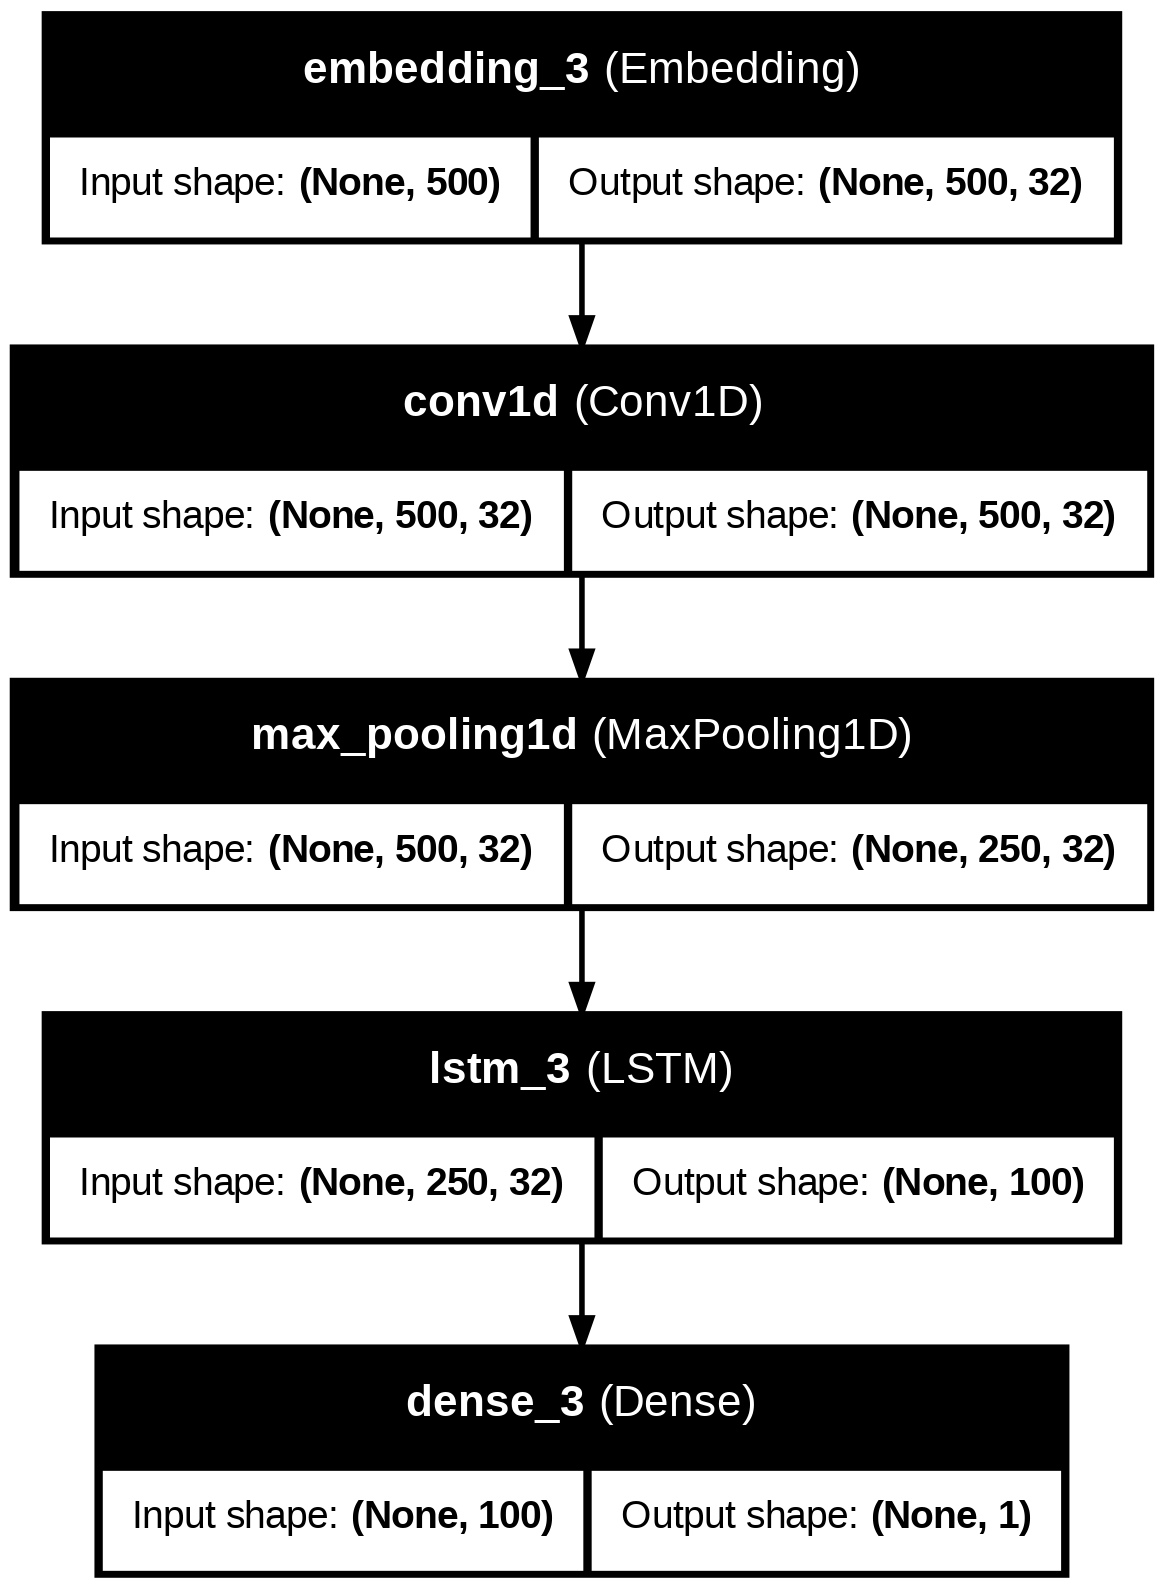

In [ ]:
plot_model(model_cnn, to_file='model_imdb_cnn.png', show_shapes=True, show_layer_names=True)

### Adding a 1-dimensional convolutional layer and a max pooling layer slightly bumped up the overall test accuracy by a percent to 88.44%. This is a better alternative to implementing the dropout layers. It seems that combining CNN and LSTM layers actually really does the trick, it's surprising! However, it should be noted that there's also barely any improvement between the three epochs in terms of loss or accuracy scores.

# Question 2: Residual Neural Networks

## NOTE: The model diagram has to be shown through model.summary() instead of plot_model() because ResNets are so complex to the point that plot_model() returns errors.

## NOTE-2: Using the CPU as the runtime environment makes each epoch run for an hour. T4 GPU is the way to go! I did 20 epochs per ResNet variant.

## Importing Libraries & Loading the Dataset

In [25]:
from keras.layers import Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, concatenate
from tensorflow.keras.models import Model

In [26]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [27]:
x_train.shape

(50000, 32, 32, 3)

In [28]:
input_shape = (32, 32, 3)

## Data Preprocessing

### NOTE: Using ResNet's preprocess_input() on x_train and x_test actually causes the validation and test accuracy to be dreadful... within the range of a 10% validation accuracy throughout each epoch. Hence, I'll only be dividing the 'x' datasets by 255 and one hot encoding the 'y' datasets.

In [29]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0



In [30]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [31]:
y_train.shape

(50000, 10)

In [32]:
from keras.applications.resnet50 import ResNet50
from keras.layers import AveragePooling2D

## ResNet 50 Model

In [33]:
base_rnet_50 = ResNet50(classes = y_train.shape[1], weights = 'imagenet', include_top = False, input_shape = input_shape)
x = base_rnet_50.output
x = AveragePooling2D(pool_size=(1,1))(x)
y = Flatten()(x)
outputs = Dense(y_train.shape[1],
activation='softmax',
kernel_initializer='he_normal')(y)

model_rnet_50 = Model(inputs = base_rnet_50.input, outputs = outputs)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Diagram of the model's layers

In [ ]:
model_rnet_50.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 23,555,082 (89.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

### Compiling and Training the Model

In [36]:
model_rnet_50.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
history_rnet_50 = model_rnet_50.fit(x_train, y_train, validation_split = 0.2, epochs = 20, batch_size = 32)

Epoch 1/20


Exception ignored in: <function AtomicFunction.__del__ at 0x7b7014b1fa30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/atomic_function.py", line 287, in __del__
    if self._generated_graph:
AttributeError: 'AtomicFunction' object has no attribute '_generated_graph'


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 93s 36ms/step - accuracy: 0.4949 - loss: 1.5740 - val_accuracy: 0.5324 - val_loss: 1.5766
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 32ms/step - accuracy: 0.5859 - loss: 1.2843 - val_accuracy: 0.5545 - val_loss: 1.4343
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.6241 - loss: 1.1107 - val_accuracy: 0.6379 - val_loss: 1.0386
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.6472 - loss: 1.0330 - val_accuracy: 0.6502 - val_loss: 1.0163
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.7015 - loss: 0.8763 - val_accuracy: 0.1521 - val_loss: 2.8172
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.6864 - loss: 0.9276 - val_accuracy: 0.6887 - val_loss: 0.9039
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.7591 - loss: 0.7023 - val_accuracy: 0.6894 - val_loss: 0.9435
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.7849 - loss: 0.62

In [41]:
scores_rn50 = model_rnet_50.evaluate(x_test, y_test, verbose=0)
print("Test Loss: %.4f" % (scores_rn50[0]))
print("Test Accuracy: %.2f%%" % (scores_rn50[1]*100))

Test Loss: 1.1335
Test Accuracy: 74.11%


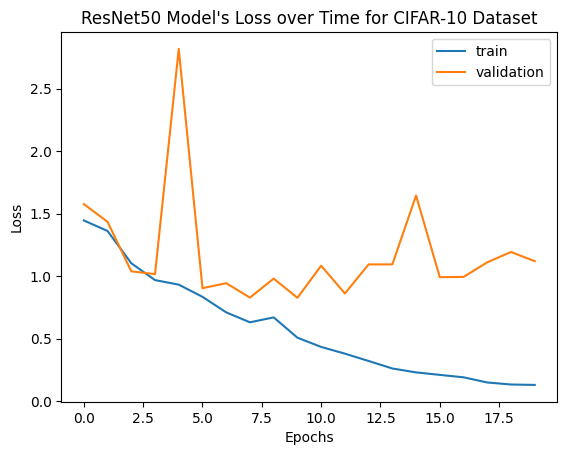

In [43]:
pyplot.plot(history_rnet_50.history['loss'], label='train')
pyplot.plot(history_rnet_50.history['val_loss'], label='validation')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.title('ResNet50 Model\'s Loss over Time for CIFAR-10 Dataset')
pyplot.legend()
pyplot.show()

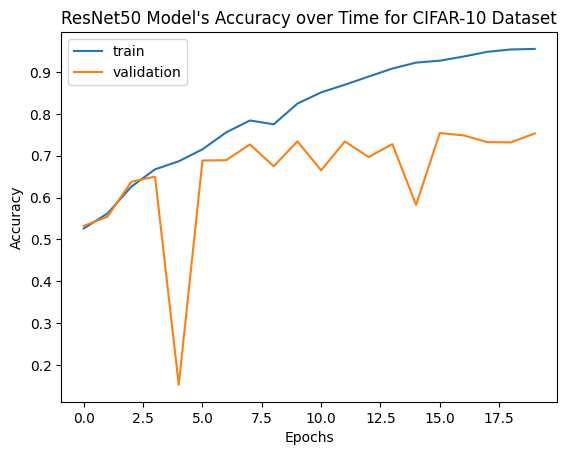

In [44]:
pyplot.plot(history_rnet_50.history['accuracy'], label='train')
pyplot.plot(history_rnet_50.history['val_accuracy'], label='validation')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.title('ResNet50 Model\'s Accuracy over Time for CIFAR-10 Dataset')
pyplot.legend()
pyplot.show()

### Overall, ResNet50 obtained a 74.11% accuracy on the test data. This is decent, though it could be better. The model seems to be underfitted.

### In terms of the results over 20 epochs, there was one outlier in the results. During the 5th epoch, the validation accuracy shot down to around 0.15 and the loss spiked.

### Now, let's try ResNet101 and see how it compares!

## ResNet101 Model

### Building the Model

In [47]:
from keras.applications import ResNet101

In [48]:
base_rnet_101 = ResNet101(classes = y_train.shape[1], weights = 'imagenet', include_top = False, input_shape = input_shape)
x = base_rnet_101.output
x = AveragePooling2D(pool_size=(1,1))(x)
y = Flatten()(x)
outputs_101 = Dense(y_train.shape[1],
activation='softmax',
kernel_initializer='he_normal')(y)

model_rnet_101 = Model(inputs = base_rnet_101.input, outputs = outputs_101)

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### ResNet101 Model Diagram

In [54]:
model_rnet_101.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 127,825,312 (487.61 MB)

 Trainable params: 42,573,322 (162.40 MB)

 Non-trainable params: 105,344 (411.50 KB)

 Optimizer params: 85,146,646 (324.81 MB)

### Compiling and Training the Model

In [49]:
model_rnet_101.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
history_rnet_101 = model_rnet_101.fit(x_train, y_train, validation_split = 0.2, epochs = 20, batch_size = 32)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 183s 70ms/step - accuracy: 0.2331 - loss: 2.3812 - val_accuracy: 0.2739 - val_loss: 2.3744
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 93s 60ms/step - accuracy: 0.3742 - loss: 1.7575 - val_accuracy: 0.4507 - val_loss: 1.5107
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 63ms/step - accuracy: 0.5378 - loss: 1.2970 - val_accuracy: 0.4986 - val_loss: 1.4751
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 61ms/step - accuracy: 0.6507 - loss: 1.0337 - val_accuracy: 0.3341 - val_loss: 2.3980
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.6569 - loss: 1.0473 - val_accuracy: 0.4880 - val_loss: 2.0451
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - accuracy: 0.6898 - loss: 0.9465 - val_accuracy: 0.6171 - val_loss: 1.2785
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - accuracy: 0.7474 - loss: 0.7539 - val_accuracy: 0.4765 - val_loss: 2.0726
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 63ms/step - accuracy: 0.7489 

In [51]:
scores_rn101 = model_rnet_101.evaluate(x_test, y_test, verbose=0)
print("Test Loss: %.4f" % (scores_rn101[0]))
print("Accuracy: %.2f%%" % (scores_rn101[1]*100))

Test Loss: 2.0056
Accuracy: 63.75%


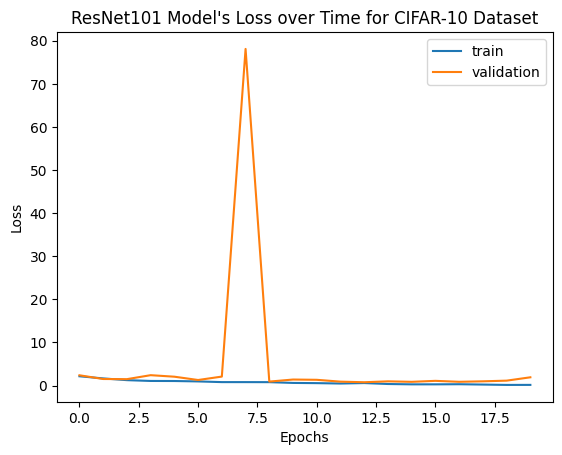

In [52]:
pyplot.plot(history_rnet_101.history['loss'], label='train')
pyplot.plot(history_rnet_101.history['val_loss'], label='validation')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.title('ResNet101 Model\'s Loss over Time for CIFAR-10 Dataset')
pyplot.legend()
pyplot.show()

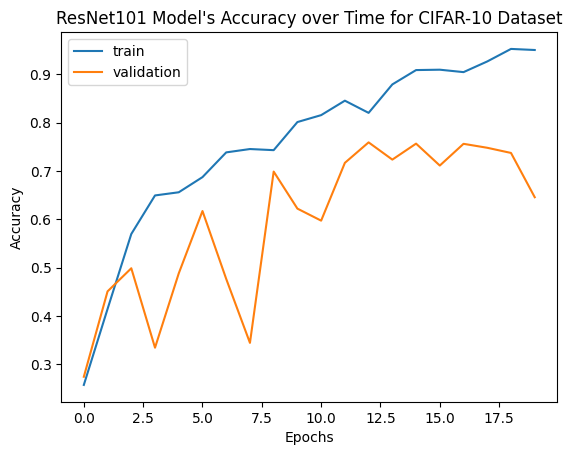

In [53]:
pyplot.plot(history_rnet_101.history['accuracy'], label='train')
pyplot.plot(history_rnet_101.history['val_accuracy'], label='validation')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.title('ResNet101 Model\'s Accuracy over Time for CIFAR-10 Dataset')
pyplot.legend()
pyplot.show()

### The test accuracy of the ResNet101 model was over 10% worse than that of ResNet50. This shows that a deeper model like ResNet101 can struggle to converage if put under certain conditions. Modifications are probably needed in regards to the learning rate and number of epochs if we want this model to be better than ResNet50.

### In addition, there's a HUGE outlier on the 8th epoch. The validation loss spiked up to nearly 80! This was unprecedented, and I wonder why this is the case.